# TP 2 ALC 

## Integrantes:
- A
- B

## Dependencias

Tabla nutricional input POR DIA

Esto es lo que tenemos que calñcular con la funcion del Ejercicio 2

In [2]:
# Instalacion de paquetes faltantes
#!pip install scipy
#!pip install pandas --upgrade
#!pip install seaborn --upgrade
#!pip install scikit-learn
#!pip install matplotlib --upgrade

In [3]:
from funciones import *

c:\Users\Igancio\Documents\UBA\ALC-TP2\funciones.py:87: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  consumidores=consumidores_original.applymap(Mayuscula)
c:\Users\Igancio\Documents\UBA\ALC-TP2\funciones.py:88: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nutricional=nutricional_original.applymap(Mayuscula)
c:\Users\Igancio\Documents\UBA\ALC-TP2\funciones.py:90: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  consumidores=consumidores.applymap(sacar_acentos)
c:\Users\Igancio\Documents\UBA\ALC-TP2\funciones.py:91: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nutricional=nutricional.applymap(sacar_acentos)


### Consigna 1

Esta funcion devuelve la tabla nutricional con 0 completados, renombramiento y recalculo de Na, Ca y Fe. Faltaria normalizar las columnas de alimentos

In [4]:
tabla_nutricional().head()

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Verdura/Fruta
0,LECHE FLUIDA ENTERA,270.00,12.42,8.37,7.83,0.15390,0.28350,0.000189,0.0,4.99,2.19,0.520,0.0,0
1,LECHE ENTERA EN POLVO,11.00,4.51,2.84,2.73,0.04444,0.09900,0.000060,0.0,1.62,0.77,0.060,0.0,0
2,YOGURT,19.00,2.45,0.51,0.49,0.00799,0.01767,0.000005,0.0,0.32,0.14,0.014,0.0,0
3,QUESO CREMA,1.66,0.06,0.10,0.37,0.00123,0.00093,0.000000,0.0,0.36,0.11,0.010,0.0,0
4,QUESO CUARTIROLO,3.66,0.06,0.77,0.80,0.02084,0.01654,0.000000,0.0,0.76,0.21,0.020,0.0,0


### Consigna 2

El ejercicio da Falso ya que falta hacer arreglo donde la cantidad maxima de nutrientes es la suma de nutrientes, no de la cantidad del alimento

In [5]:
chequeoDieta(tabla_nutricional())

189.797 112.41299999999997 284.6955
1043.8835 410.2349999999999 1423.4775
284.6955 76.911 569.391
3.337714  >  0.2
21.26  >  25
650.0 >= 400


False

### Consigna 3

Primero preparamos la tabla nutricional para un gramo de cada alimento (Aca tambien tenemos que hacer la cantidad de un gramo es de la cantidad o de la suma de nutrientes????)

In [6]:
tabla_nutricional = tabla_nutricional()

tabla_limpia = tabla_nutricional.drop(columns=["Alimento", "Cantidad (gr/ml)", "Verdura/Fruta"])

tabla_divida = pd.DataFrame()

for i in range(0, len(tabla_nutricional)):
    tabla_divida = tabla_divida._append(tabla_limpia.iloc[i]/tabla_nutricional["Cantidad (gr/ml)"].iloc[i])

tabla_divida.head()


,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,0.046000,0.031000,0.029000,0.000570,0.001050,7.000000e-07,0.0,0.018481,0.008111,0.001926,0.0
1,0.410000,0.258182,0.248182,0.004040,0.009000,5.454545e-06,0.0,0.147273,0.070000,0.005455,0.0
2,0.128947,0.026842,0.025789,0.000421,0.000930,2.631579e-07,0.0,0.016842,0.007368,0.000737,0.0
3,0.036145,0.060241,0.222892,0.000741,0.000560,0.000000e+00,0.0,0.216867,0.066265,0.006024,0.0
4,0.016393,0.210383,0.218579,0.005694,0.004519,0.000000e+00,0.0,0.207650,0.057377,0.005464,0.0


Calculamos la matriz con escalado estandar (Tabla Estrella)

In [7]:
tabla_estrella = tabla_divida - tabla_divida.mean()

tabla_estrella.head()

,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,-0.141722,-0.041134,-0.073702,-0.012232,0.000359,-0.000011,-0.07063,-0.023724,-0.022930,-0.029649,-0.007621
1,0.222278,0.186048,0.145479,-0.008762,0.008309,-0.000006,-0.07063,0.105067,0.038959,-0.026120,-0.007621
2,-0.058775,-0.045292,-0.076913,-0.012382,0.000239,-0.000011,-0.07063,-0.025364,-0.023672,-0.030838,-0.007621
3,-0.151577,-0.011893,0.120189,-0.012061,-0.000130,-0.000011,-0.07063,0.174662,0.035224,-0.025550,-0.007621
4,-0.171329,0.138249,0.115877,-0.007108,0.003829,-0.000011,-0.07063,0.165444,0.026336,-0.026110,-0.007621


Con esto podemos cacular la matriz de covarianza

In [8]:
covarianza = (tabla_estrella.transpose() @ tabla_estrella)/len(tabla_estrella)

covarianza

,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
HC (gr),7.712939e-02,-2.807587e-04,-1.211085e-02,-1.551012e-03,1.181821e-05,6.001139e-07,4.044257e-02,-4.924729e-03,-3.097968e-03,-5.099179e-03,1.104142e-03
Proteinas (gr),-2.807587e-04,7.422239e-03,1.998140e-04,-6.388112e-07,7.958394e-05,6.568193e-07,-3.155509e-03,1.821622e-03,5.953635e-04,-1.759198e-03,-1.890942e-04
Grasas (gr),-1.211085e-02,1.998140e-04,4.862791e-02,-6.858051e-04,7.066464e-05,-5.252520e-07,-5.215232e-03,1.349103e-02,1.212881e-02,2.205015e-02,-6.869077e-04
Na (gr),-1.551012e-03,-6.388112e-07,-6.858051e-04,3.665155e-03,-2.762780e-06,-4.505414e-08,-8.487049e-04,-3.080117e-04,-2.502751e-04,-2.386549e-04,-9.353908e-05
Ca (gr),1.181821e-05,7.958394e-05,7.066464e-05,-2.762780e-06,3.147284e-06,-4.327654e-09,-5.708222e-06,6.696622e-05,1.839944e-05,-1.352182e-05,-3.153673e-06
Fe (gr),6.001139e-07,6.568193e-07,-5.252520e-07,-4.505414e-08,-4.327654e-09,2.554781e-10,-3.713413e-07,-1.961262e-07,-5.558786e-08,-2.440272e-07,1.670945e-08
Azucares Libres (gr),4.044257e-02,-3.155509e-03,-5.215232e-03,-8.487049e-04,-5.708222e-06,-3.713413e-07,4.840577e-02,-2.158981e-03,-1.280549e-03,-2.106708e-03,-3.286463e-04
AGS (gr),-4.924729e-03,1.821622e-03,1.349103e-02,-3.080117e-04,6.696622e-05,-1.961262e-07,-2.158981e-03,7.186318e-03,3.924956e-03,2.655723e-03,-3.024027e-04
AGNI (gr),-3.097968e-03,5.953635e-04,1.212881e-02,-2.502751e-04,1.839944e-05,-5.558786e-08,-1.280549e-03,3.924956e-03,3.559516e-03,4.678748e-03,-1.962697e-04
AG p (gr),-5.099179e-03,-1.759198e-03,2.205015e-02,-2.386549e-04,-1.352182e-05,-2.440272e-07,-2.106708e-03,2.655723e-03,4.678748e-03,1.419118e-02,-2.187988e-04


Calculamos los autovectores y autovalores de la matriz de Covarianza

In [9]:
gamma, U = np.linalg.eigh(covarianza)
U = np.flip(U, 1)


print("Autovalores: ", gamma)

for i in range(0, len(U)):
    print("Autovector ", i, ": ", U[:,i])


Autovalores:  [1.27809441e-10 1.68445740e-06 4.89912089e-05 1.64502818e-04
 4.88482520e-04 3.59396002e-03 4.56778171e-03 9.72545500e-03
 2.00972951e-02 6.07352269e-02 1.10880707e-01]
Autovector  0 :  [-7.80433987e-01  1.89810336e-02  2.72255000e-01  1.31262354e-02
  1.82359702e-04 -4.06518021e-06 -5.37584169e-01  8.96677132e-02
  6.83285927e-02  1.20370148e-01 -8.51993884e-03]
Autovector  1 :  [ 2.15232426e-01 -1.58198638e-02  8.13468269e-01 -2.28619578e-02
  1.15182536e-03 -8.96127083e-06  2.44810397e-01  2.08693167e-01
  2.01103324e-01  3.83601512e-01 -9.61653784e-03]
Autovector  2 :  [ 5.78481788e-01  1.85939653e-01  7.07428617e-02 -1.79356538e-02
  1.62142327e-03  3.57206216e-05 -7.89177137e-01  2.01997580e-02
  2.01770783e-02  1.50841338e-02  4.01642521e-02]
Autovector  3 :  [-5.65761027e-02  6.65353033e-01  6.47345327e-02 -2.14195466e-02
  1.02423940e-02  3.48833743e-05  1.26507287e-01  5.07058558e-01
  1.33798316e-01 -5.07027689e-01 -3.54778838e-02]
Autovector  4 :  [-6.63092957

Veamos la variabilidad de cada autovector

In [10]:
for i in range(0, len(gamma)):
    print("Variabilidad de Autovector", i, ": ", 100*gamma[i]/sum(gamma), "%")

Variabilidad de Autovector 0 :  6.077363649304036e-08 %
Variabilidad de Autovector 1 :  0.0008009627523305252 %
Variabilidad de Autovector 2 :  0.023295414608125627 %
Variabilidad de Autovector 3 :  0.07822140829391848 %
Variabilidad de Autovector 4 :  0.23227438309952111 %
Variabilidad de Autovector 5 :  1.7089349426558185 %
Variabilidad de Autovector 6 :  2.17198903662497 %
Variabilidad de Autovector 7 :  4.624472662617956 %
Variabilidad de Autovector 8 :  9.556302683201654 %
Variabilidad de Autovector 9 :  28.87971788194276 %
Variabilidad de Autovector 10 :  52.723990563429304 %


Esto nos dice que ya con los ultimos 3 autovectores vamos a tener una precision del casi 95% de los datos. Asi que calculamos nuestra nueva tabla con estos 3 autovectores

In [11]:
autovectores = U[:,len(U)-3:len(U)]

tabla_final =  tabla_estrella @ autovectores

tabla_final = tabla_final.rename(index = tabla_nutricional["Alimento"], columns={0:"Z1", 1:"Z2", 2:"Z3"})

tabla_final.head()

,Z1,Z2,Z3
LECHE FLUIDA ENTERA,0.008446,-0.000939,0.000002
LECHE ENTERA EN POLVO,0.008418,-0.005447,-0.000004
YOGURT,0.011246,-0.000867,0.000004
QUESO CREMA,0.003557,0.001559,0.000004
QUESO CUARTIROLO,-0.002795,-0.000823,0.000007


Veamos los graficos de cada uno de las convinaciones de columnas para sacar conclusiones

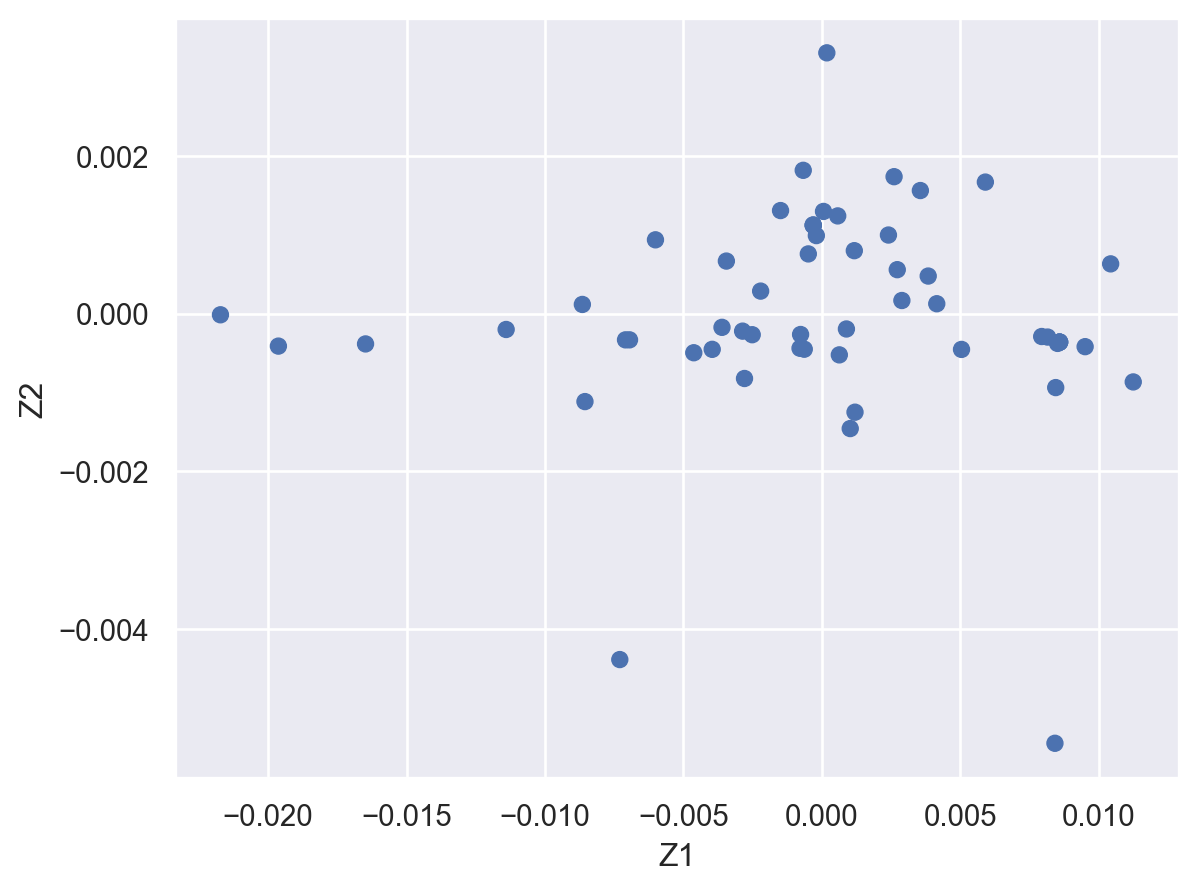

In [12]:
(
so.Plot()
.add(so.Dot(), data=tabla_final, x="Z1", y="Z2")
)

In [13]:
tabla_final[tabla_final["Z1"]<-0.02]

,Z1,Z2,Z3
ARVEJAS EN LATA,-0.021723,-0.000016,-0.000002


In [14]:
tabla_final[tabla_final["Z1"]>0.01]

,Z1,Z2,Z3
YOGURT,0.011246,-0.000867,0.000004
HARINA MAIZ,0.010430,0.000629,-0.000002


In [15]:
tabla_final[tabla_final["Z2"]<-0.0015]

,Z1,Z2,Z3
LECHE ENTERA EN POLVO,0.008418,-0.005447,-0.000004
QUESO RALLAR,-0.007299,-0.004386,0.000002


In [16]:
tabla_final[tabla_final["Z2"]>0.002]

,Z1,Z2,Z3
MORTADELA,0.000179,0.003305,0.000017


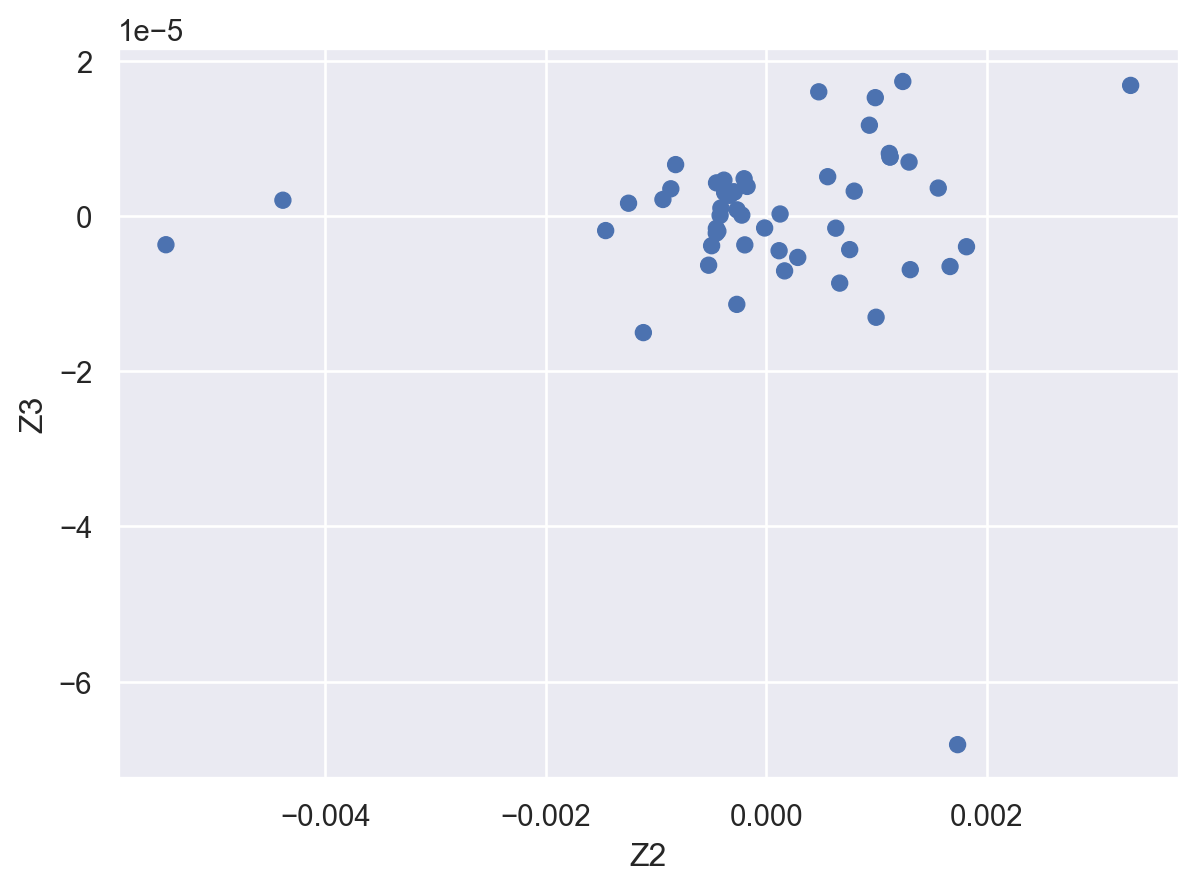

In [17]:
(
so.Plot()
.add(so.Dot(), data=tabla_final, x="Z2", y="Z3")
)

In [18]:
tabla_final[tabla_final["Z3"] < -0.0001]

,Z1,Z2,Z3


In [19]:
tabla_final[tabla_final["Z3"] > 0.000055]

,Z1,Z2,Z3


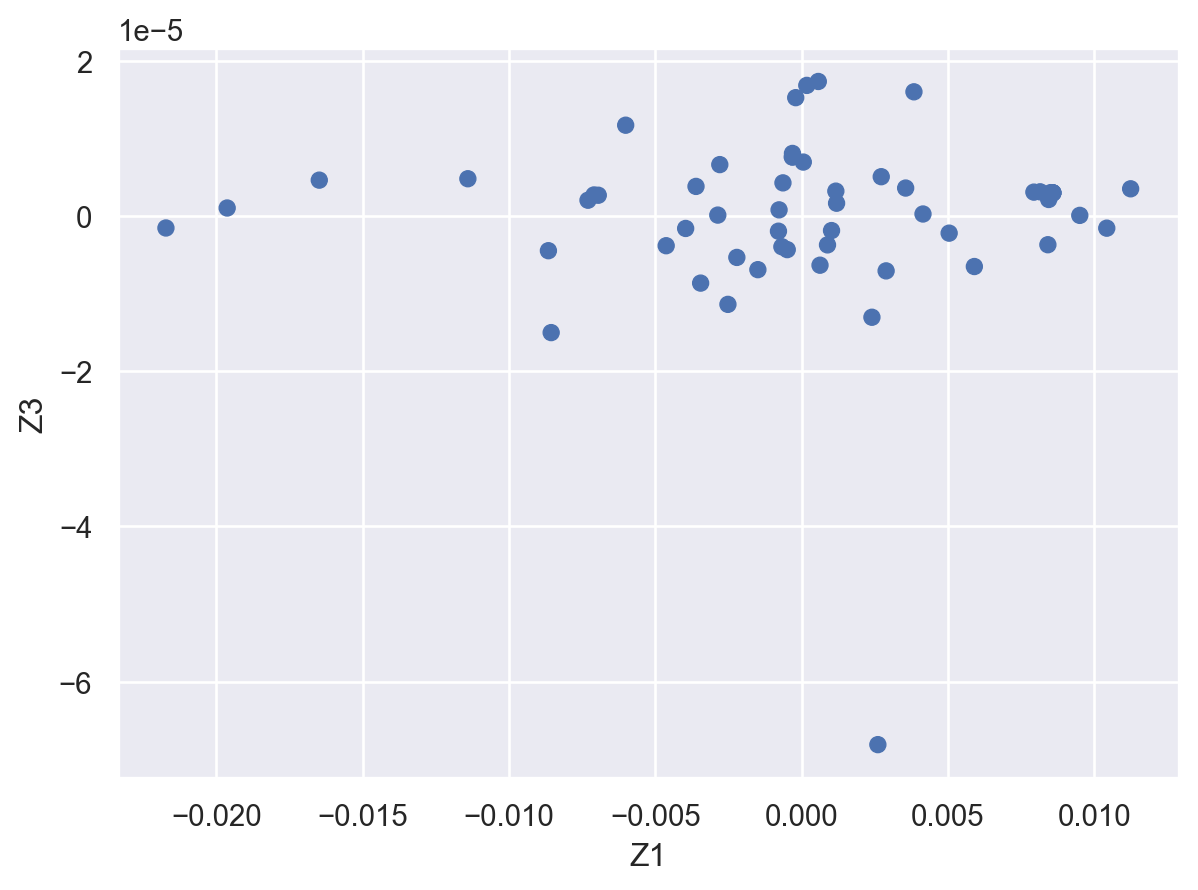

In [20]:
(
so.Plot()
.add(so.Dot(), data=tabla_final, x="Z1", y="Z3")
)

Tambien hicimos un grafico en 3D para ver la relacion de estas 3 columnas juntas

<Axes3D: >

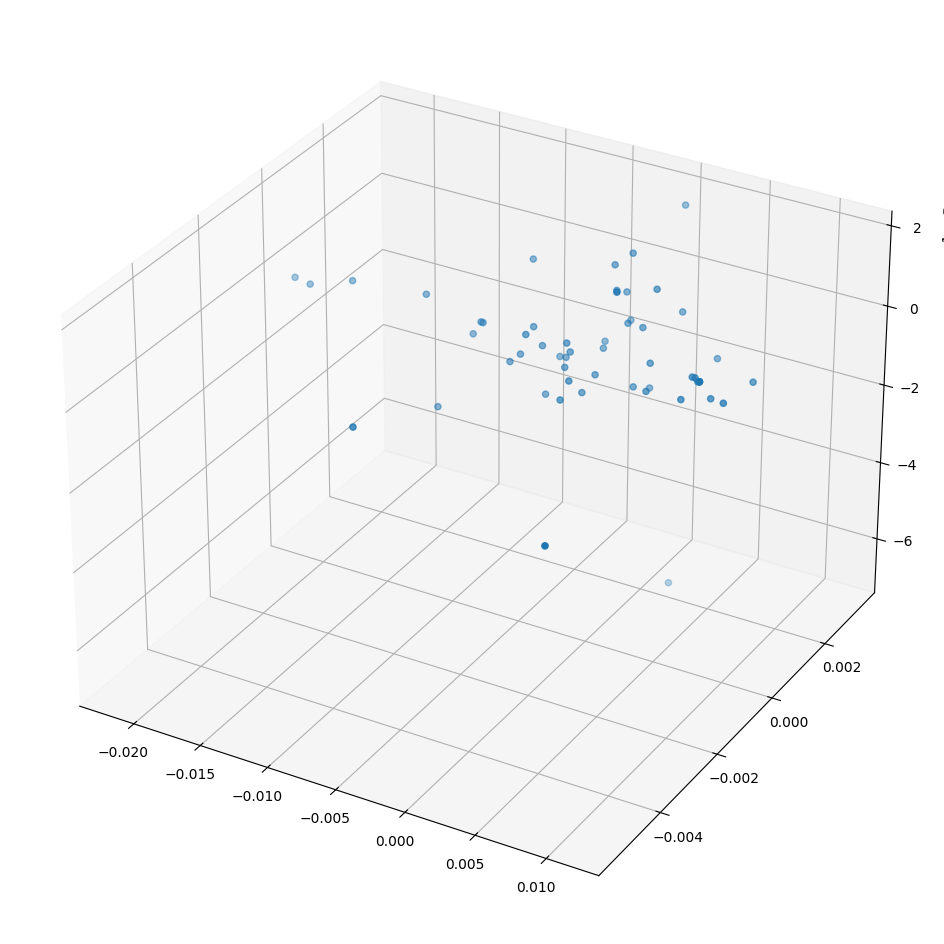

In [21]:
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(tabla_final["Z1"],tabla_final["Z2"],tabla_final["Z3"])

ax

### Consigna 4

Si mi ACP viene de un espacio de 11, como quieren que arregle a 5?

Seguro que hay que cambiarle la base para poder hacer el cambio (De R11 a R5)

Vamos a pedir nuestras tablas 

In [22]:
consumidores = tabla_consumidores()

consumidores


,PRODUCTOS,Cantidad (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0
5,HUEVOS COLOR DOCENA,720,2200.0,2600.0,3000.0,3400.0,3800.0
6,PAN FRESCO,1000,1650.0,2100.0,2200.0,2300.0,2300.0
7,LECHE C/VIT.FORT,1000,1100.0,1210.0,1620.0,1890.0,1990.0
8,YERBA TARAGUI,1000,2800.0,3700.0,4600.0,4950.0,5500.0
9,ZANAHORIAS,1000,820.0,990.0,1100.0,1100.0,1100.0


In [23]:
consumidores_clean = consumidores.drop(columns=["PRODUCTOS", "Cantidad (gr)"])

consumidores_clean

,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,2500.0,3100.0,3450.0,3600.0,3700.0
1,1650.0,2300.0,2800.0,3100.0,3550.0
2,1990.0,2050.0,2050.0,2100.0,2100.0
3,1600.0,1990.0,2150.0,2200.0,2290.0
4,950.0,1250.0,1350.0,1500.0,1690.0
5,2200.0,2600.0,3000.0,3400.0,3800.0
6,1650.0,2100.0,2200.0,2300.0,2300.0
7,1100.0,1210.0,1620.0,1890.0,1990.0
8,2800.0,3700.0,4600.0,4950.0,5500.0
9,820.0,990.0,1100.0,1100.0,1100.0


In [24]:
consumidores_gramo = pd.DataFrame()

for i in range(0, len(consumidores_clean)):
    consumidores_gramo = consumidores_gramo._append(consumidores_clean.iloc[i].div(consumidores["Cantidad (gr)"].iloc[i]), ignore_index = True)

consumidores_gramo

,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,1.666667,2.066667,2.300000,2.400000,2.466667
1,1.650000,2.300000,2.800000,3.100000,3.550000
2,1.990000,2.050000,2.050000,2.100000,2.100000
3,3.200000,3.980000,4.300000,4.400000,4.580000
4,0.950000,1.250000,1.350000,1.500000,1.690000
5,3.055556,3.611111,4.166667,4.722222,5.277778
6,1.650000,2.100000,2.200000,2.300000,2.300000
7,1.100000,1.210000,1.620000,1.890000,1.990000
8,2.800000,3.700000,4.600000,4.950000,5.500000
9,0.820000,0.990000,1.100000,1.100000,1.100000


Con esto tengo cada columna, ahora me faltaria proyectar cada una en el espacio de los ACP para conseguir el precio de cada epoca de su nutriente. 

### Consigna 5

Decidimos usar la leche nio en polvo
Tomate Perrita 
Paleta No cocida(Mas nutrientes)

In [25]:
tabla_nutricional_filtrada = pd.DataFrame()

tabla_nutricional_filtrada["Alimento"] = tabla_nutricional["Alimento"]


tabla_nutricional_filtrada[["HC (gr)","Proteinas (gr)","Grasas (gr)"]] = tabla_divida[["HC (gr)","Proteinas (gr)","Grasas (gr)"]]

#Dropeo de filas no buscadas
tabla_nutricional_filtrada = tabla_nutricional_filtrada[~tabla_nutricional_filtrada["Alimento"].isin(["TOMATE ENVASADO","LECHE ENTERA EN POLVO","PALETA COCIDA"])]

tabla_nutricional_filtrada['Alimento']=tabla_nutricional_filtrada['Alimento'].apply(arreglo_observacional)

tabla_nutricional_filtrada.head()

,Alimento,HC (gr),Proteinas (gr),Grasas (gr)
0,LECHE,0.046000,0.031000,0.029000
2,YOGURT,0.128947,0.026842,0.025789
3,QUESO CREMA,0.036145,0.060241,0.222892
4,QUESO CUARTIROLO,0.016393,0.210383,0.218579
5,QUESO RALLAR,0.036145,0.331325,0.271084


In [26]:
consumidores_gramo

consumidores_gramo["PRODUCTOS"] = consumidores['PRODUCTOS'].apply(arreglo_observacional)

consumidores_gramo = consumidores_gramo.rename(columns={"PRODUCTOS":"Alimento"})

consumidores_gramo.head()

,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,Alimento
0,1.666667,2.066667,2.30,2.4,2.466667,ACEITE
1,1.650000,2.300000,2.80,3.1,3.550000,ARROZ
2,1.990000,2.050000,2.05,2.1,2.100000,AZUCAR
3,3.200000,3.980000,4.30,4.4,4.580000,FIDEOS
4,0.950000,1.250000,1.35,1.5,1.690000,HARINA DE TRIGO


In [27]:
consumidores_nutricional = pd.merge(tabla_nutricional_filtrada,consumidores_gramo, on='Alimento')

consumidores_nutricional

,Alimento,HC (gr),Proteinas (gr),Grasas (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,LECHE,0.046000,0.031000,0.029000,1.100000,1.210000,1.620000,1.890000,1.990000
1,HUEVO,0.000000,0.120000,0.118125,3.055556,3.611111,4.166667,4.722222,5.277778
2,ASADO,0.000000,0.186000,0.150000,5.400000,6.300000,7.500000,7.600000,7.750000
3,PALETA,0.000000,0.200000,0.100000,5.200000,6.200000,7.100000,7.800000,7.900000
4,CARNE PICADA,0.000000,0.200000,0.100000,4.200000,4.800000,5.200000,5.200000,5.500000
5,BOLA DE LOMO,0.000000,0.212059,0.014118,6.200000,7.200000,8.300000,8.500000,8.650000
6,ACELGA,0.000000,0.029200,0.000000,0.500000,0.688889,1.222222,2.211111,2.211111
7,ZANAHORIA,0.080000,0.010741,0.000000,0.820000,0.990000,1.100000,1.100000,1.100000
8,TOMATE,0.041014,0.010000,0.000000,1.200000,1.100000,1.200000,2.300000,2.700000
9,CEBOLLA,0.022045,0.007955,0.000000,0.500000,0.700000,0.990000,1.150000,1.500000


In [28]:
melted_nutricional = consumidores_nutricional.melt(id_vars=["Alimento","HC (gr)","Proteinas (gr)","Grasas (gr)"],var_name='Fecha',value_name='Precio por gr ($)')

melted_nutricional

,Alimento,HC (gr),Proteinas (gr),Grasas (gr),Fecha,Precio por gr ($)
0,LECHE,0.046000,0.031000,0.029000,31/12/2023,1.100000
1,HUEVO,0.000000,0.120000,0.118125,31/12/2023,3.055556
2,ASADO,0.000000,0.186000,0.150000,31/12/2023,5.400000
3,PALETA,0.000000,0.200000,0.100000,31/12/2023,5.200000
4,CARNE PICADA,0.000000,0.200000,0.100000,31/12/2023,4.200000
...,...,...,...,...,...,...
95,FIDEOS,0.725893,0.127679,0.015714,30/4/2024,4.580000
96,PAPA,0.176987,0.026987,0.000000,30/4/2024,0.900000
97,ACEITE,0.000000,0.000000,1.000000,30/4/2024,2.466667
98,AZUCAR,1.000000,0.000000,0.000000,30/4/2024,2.100000


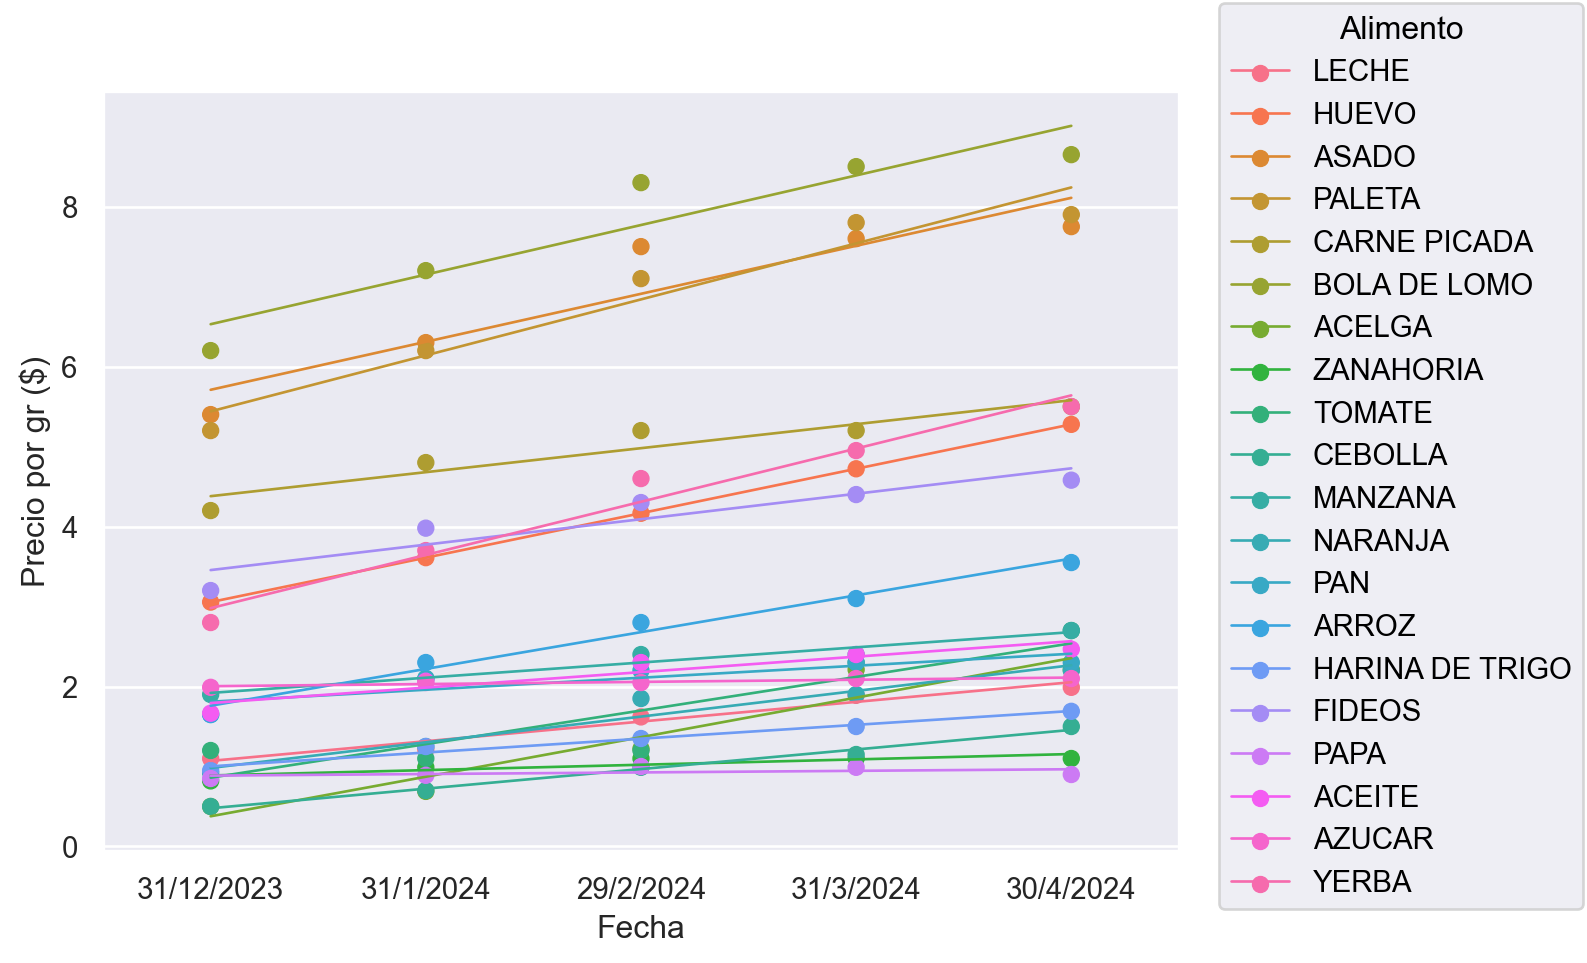

In [31]:
so.Plot(data=melted_nutricional, x="Fecha", y="Precio por gr ($)", color="Alimento").add(so.Dot()).add(so.Line(linewidth=1), so.PolyFit(1))

Precio por Gramo de Alimento

In [46]:
HC__Nutricional = melted_nutricional[melted_nutricional["HC (gr)"] > 0].drop(columns=["Proteinas (gr)", "Grasas (gr)"]).reset_index(drop=True)

HC__Nutricional.head()

,Alimento,HC (gr),Fecha,Precio por gr ($)
0,LECHE,0.046000,31/12/2023,1.10
1,ZANAHORIA,0.080000,31/12/2023,0.82
2,TOMATE,0.041014,31/12/2023,1.20
3,CEBOLLA,0.022045,31/12/2023,0.50
4,MANZANA,0.149016,31/12/2023,1.90


In [47]:
HC__Nutricional["Precio por gr ($)"] = HC__Nutricional["Precio por gr ($)"] / HC__Nutricional["HC (gr)"]

HC__Nutricional = HC__Nutricional.rename(columns={"Precio por gr ($)":"Precio por gr de HC ($)"})

HC__Nutricional.head()

,Alimento,HC (gr),Fecha,Precio por gr de HC ($)
0,LECHE,0.046000,31/12/2023,23.913043
1,ZANAHORIA,0.080000,31/12/2023,10.250000
2,TOMATE,0.041014,31/12/2023,29.257951
3,CEBOLLA,0.022045,31/12/2023,22.680412
4,MANZANA,0.149016,31/12/2023,12.750275


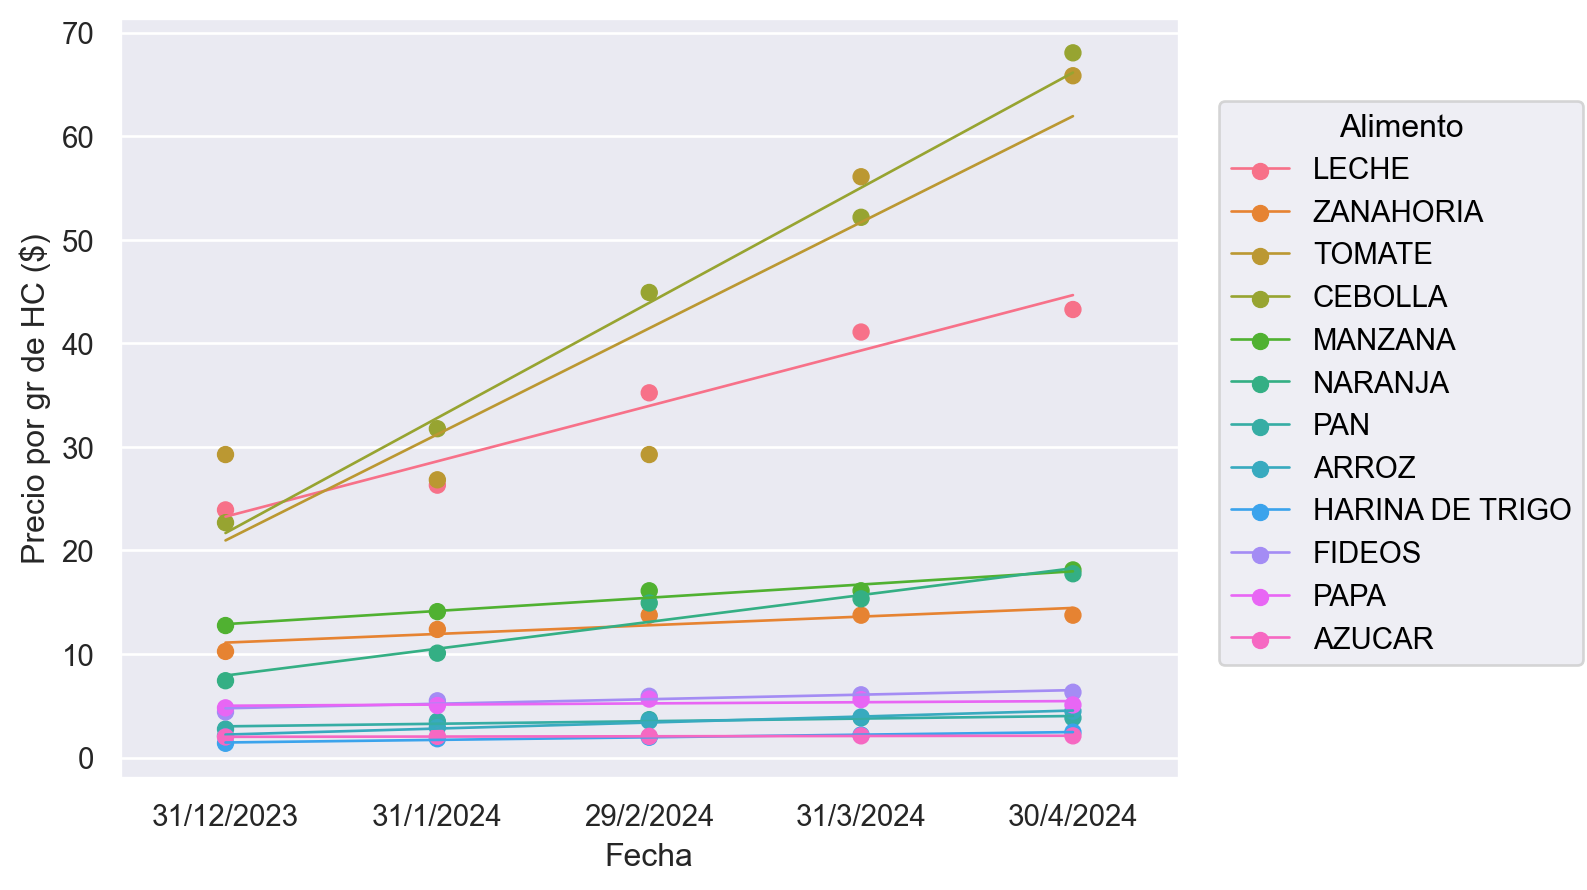

In [48]:
so.Plot(data=HC__Nutricional, x="Fecha", y="Precio por gr de HC ($)", color="Alimento").add(so.Dot()).add(so.Line(linewidth=1), so.PolyFit(1))

Precio por Gramo de HC

In [52]:
Pr__Nutricional = melted_nutricional[melted_nutricional["Proteinas (gr)"] > 0].drop(columns=["HC (gr)", "Grasas (gr)"]).reset_index(drop=True)

Pr__Nutricional.head()

,Alimento,Proteinas (gr),Fecha,Precio por gr ($)
0,LECHE,0.031,31/12/2023,1.100000
1,HUEVO,0.120,31/12/2023,3.055556
2,ASADO,0.186,31/12/2023,5.400000
3,PALETA,0.200,31/12/2023,5.200000
4,CARNE PICADA,0.200,31/12/2023,4.200000


In [53]:
Pr__Nutricional["Precio por gr ($)"] = Pr__Nutricional["Precio por gr ($)"] / Pr__Nutricional["Proteinas (gr)"]

Pr__Nutricional = Pr__Nutricional.rename(columns={"Precio por gr ($)":"Precio por gr de Proteinas ($)"})

Pr__Nutricional.head()

,Alimento,Proteinas (gr),Fecha,Precio por gr de Proteinas ($)
0,LECHE,0.031,31/12/2023,35.483871
1,HUEVO,0.120,31/12/2023,25.462963
2,ASADO,0.186,31/12/2023,29.032258
3,PALETA,0.200,31/12/2023,26.000000
4,CARNE PICADA,0.200,31/12/2023,21.000000


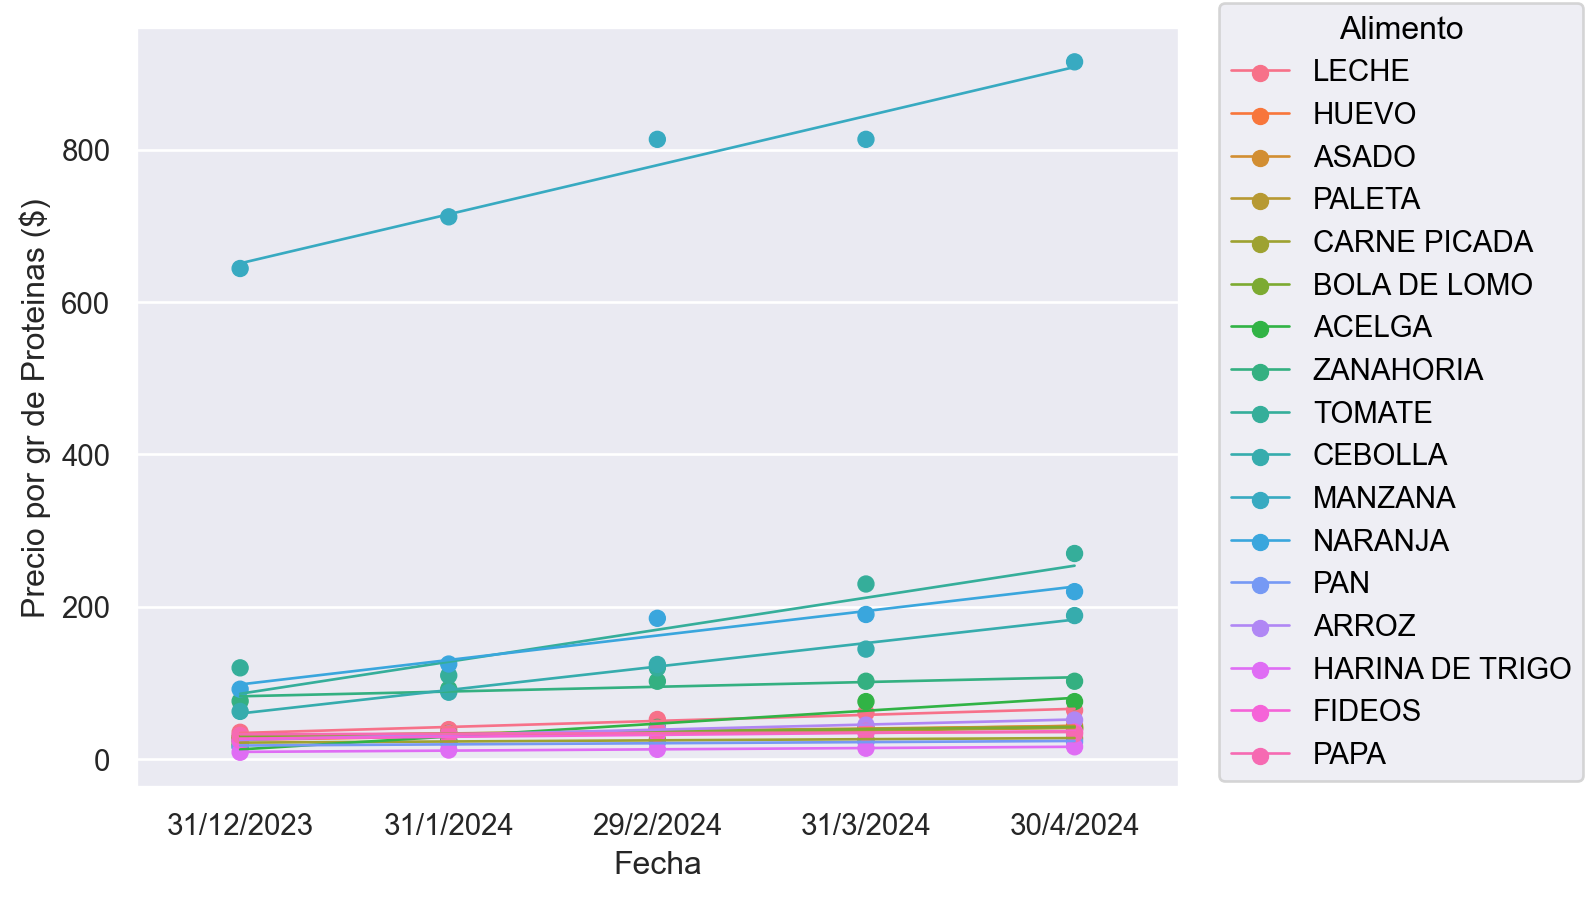

In [54]:
so.Plot(data=Pr__Nutricional, x="Fecha", y="Precio por gr de Proteinas ($)", color="Alimento").add(so.Dot()).add(so.Line(linewidth=1), so.PolyFit(1))

Sin la Manzana

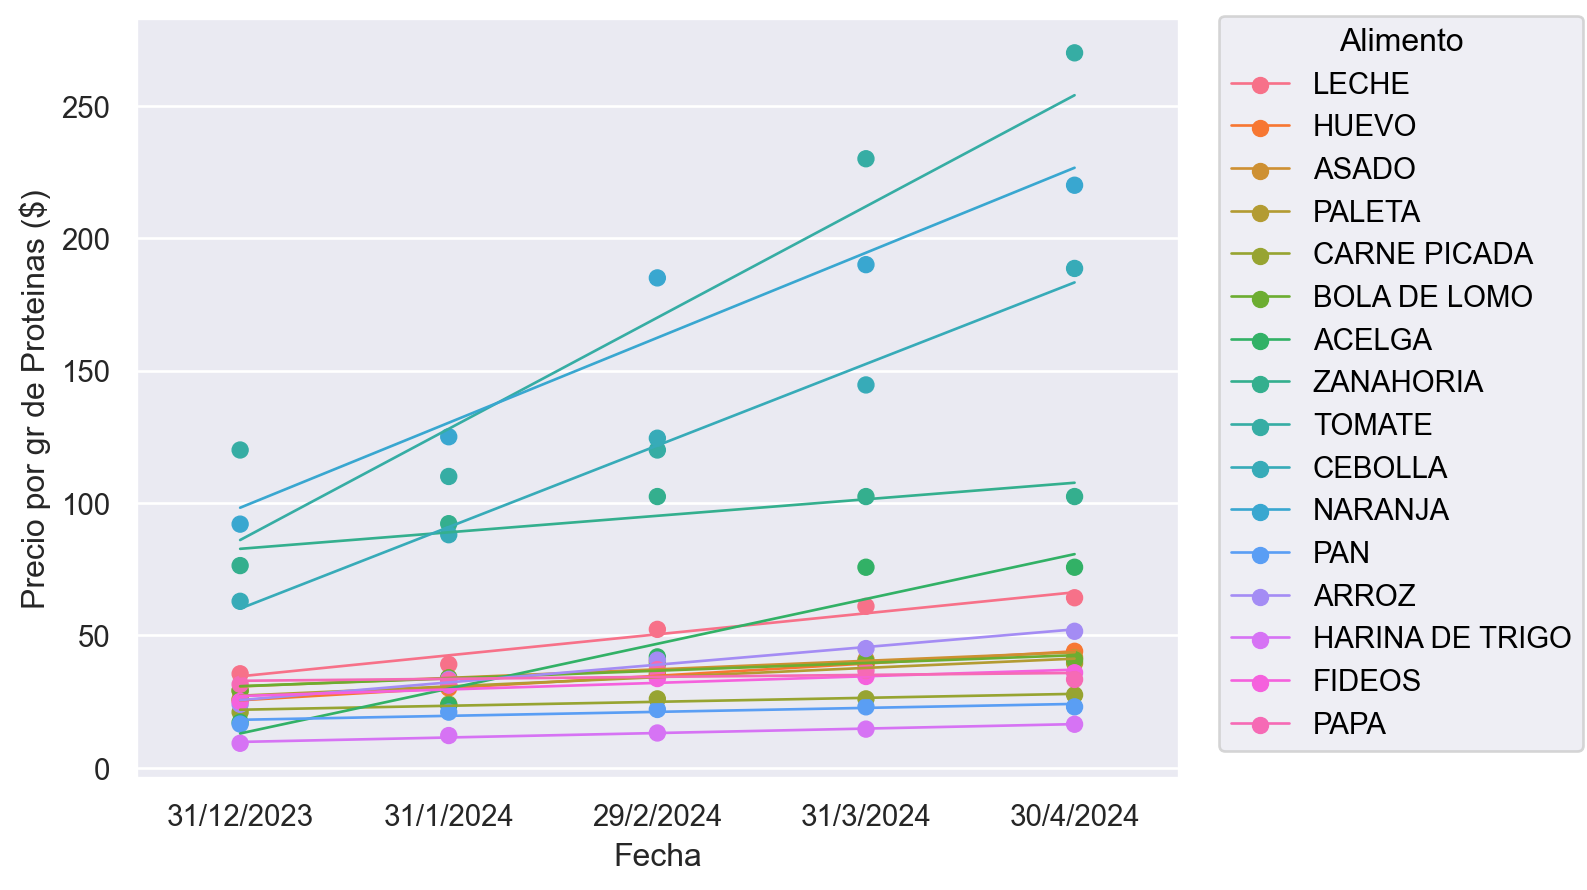

In [55]:
so.Plot(data=Pr__Nutricional[Pr__Nutricional["Precio por gr de Proteinas ($)"] < 400], x="Fecha", y="Precio por gr de Proteinas ($)", color="Alimento").add(so.Dot()).add(so.Line(linewidth=1), so.PolyFit(1))

Precio por Gramo de Proteina

In [56]:
Gr__Nutricional = melted_nutricional[melted_nutricional["Grasas (gr)"] > 0].drop(columns=["HC (gr)", "Proteinas (gr)"]).reset_index(drop=True)

Gr__Nutricional.head()

,Alimento,Grasas (gr),Fecha,Precio por gr ($)
0,LECHE,0.029000,31/12/2023,1.100000
1,HUEVO,0.118125,31/12/2023,3.055556
2,ASADO,0.150000,31/12/2023,5.400000
3,PALETA,0.100000,31/12/2023,5.200000
4,CARNE PICADA,0.100000,31/12/2023,4.200000


In [57]:
Gr__Nutricional["Precio por gr ($)"] = Gr__Nutricional["Precio por gr ($)"] / Gr__Nutricional["Grasas (gr)"]

Gr__Nutricional = Gr__Nutricional.rename(columns={"Precio por gr ($)":"Precio por gr de Grasas ($)"})

Gr__Nutricional.head()

,Alimento,Grasas (gr),Fecha,Precio por gr de Grasas ($)
0,LECHE,0.029000,31/12/2023,37.931034
1,HUEVO,0.118125,31/12/2023,25.867137
2,ASADO,0.150000,31/12/2023,36.000000
3,PALETA,0.100000,31/12/2023,52.000000
4,CARNE PICADA,0.100000,31/12/2023,42.000000


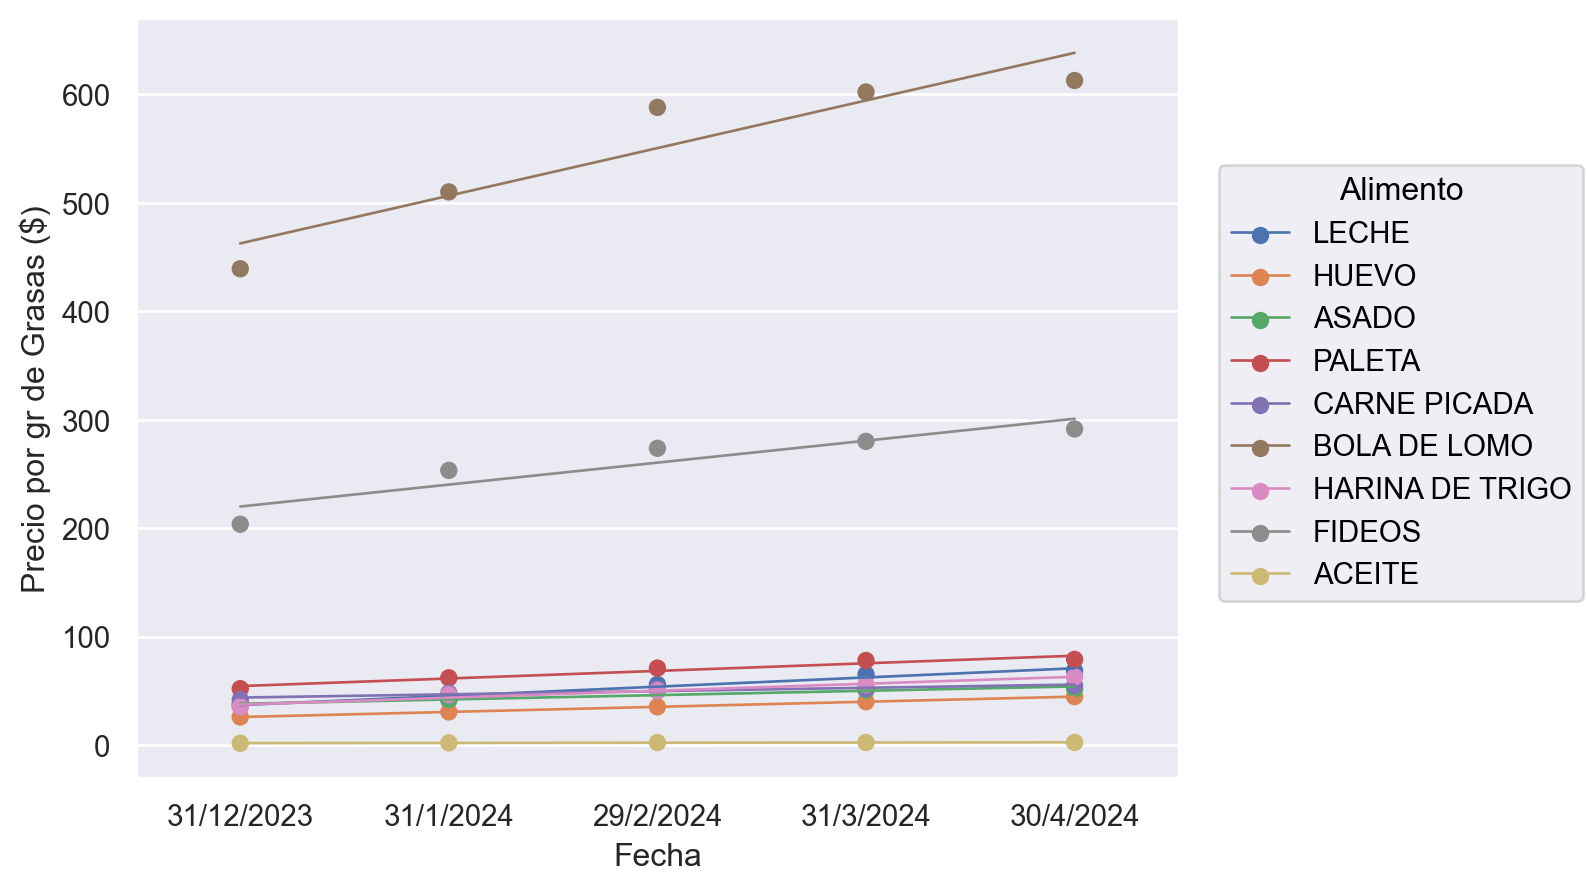

In [63]:
so.Plot(data=Gr__Nutricional, x="Fecha", y="Precio por gr de Grasas ($)", color="Alimento").add(so.Dot()).add(so.Line(linewidth=1), so.PolyFit(1))

sin outliers

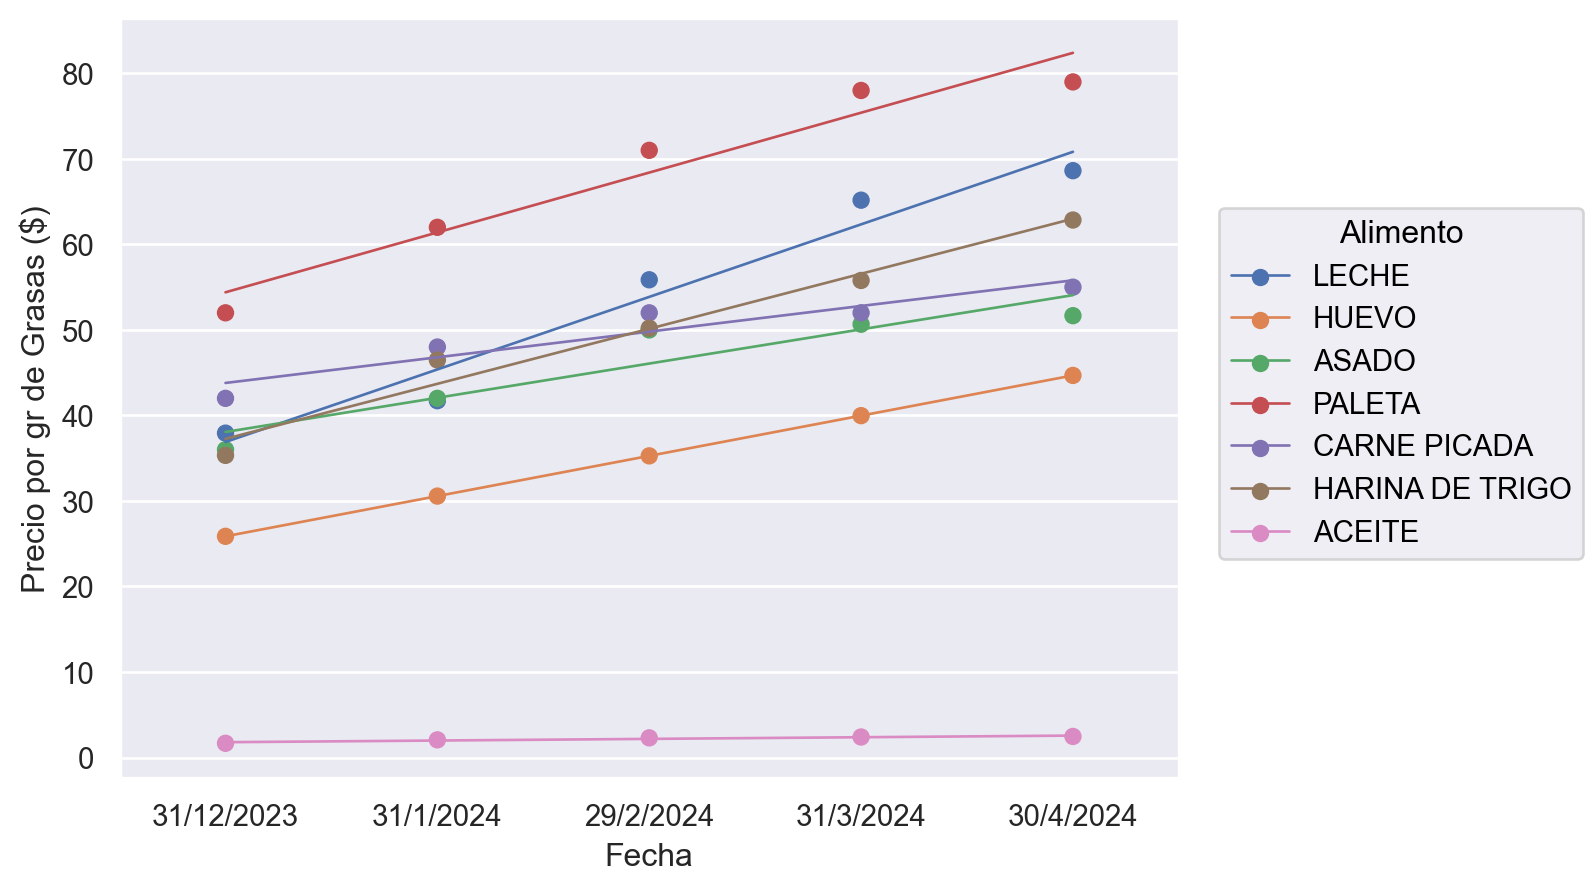

In [61]:
so.Plot(data=Gr__Nutricional[Gr__Nutricional["Precio por gr de Grasas ($)"] < 200], x="Fecha", y="Precio por gr de Grasas ($)", color="Alimento").add(so.Dot()).add(so.Line(linewidth=1), so.PolyFit(1))


Precio por Gramo de Grasas

Si yo quiero tomar el de todos, que promedio tengo que hacer. Promediar primero Cantidad y precio despues dividirlos o hay alguna otra dehacerlo?

### Consigna 6

Preparar un consumidores libres solo con carne y otro con todo lo demas. HAcer estas funciones de nuevo y ver como queda y comparar

### Consigna 7

Aca vemos que necesitamos de toda la carne y vemos alimentos que tengan altos contenidos de lo que nos falta, de ahi comparamos con la tabla de sin y vemos que alimentos tienen la menor escala de aumento y las usamos para reemplazar la carne

### Consigna 8

No se a que se esta refiriendo asi que no puedo dar muchas opiniones al respecto